# Generalized Linear Models

## Ridge Regression

The examples presented in this notebook were adapted from the book **Hands on: Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron**.

## Importing Libs

In [6]:
# Standard libs
import numpy as np

# Dataviz libs
import matplotlib.pyplot as plt

# Machine Learning libs
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Preprocessing libs
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [12]:
# Helper function to train and plot the models
def plot_model(model_class, polynomial, degrees, alphas, model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # Pass alpha positionally and ensure it's not in model_kargs
        model = model_class(alpha, **{k: v for k, v in model_kargs.items() if k != "alpha"}) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degrees, include_bias=False)),
                ("regression", model),
            ])
        model.fit(X, y)  # Train model (assuming X, y are defined)
        y_pred = model.predict(X_new)  # Predict (assuming X_new is defined)
        plt.plot(X_new, y_pred, style, label=f"alpha={alpha}")
    plt.legend()

In [13]:
# Generating the data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

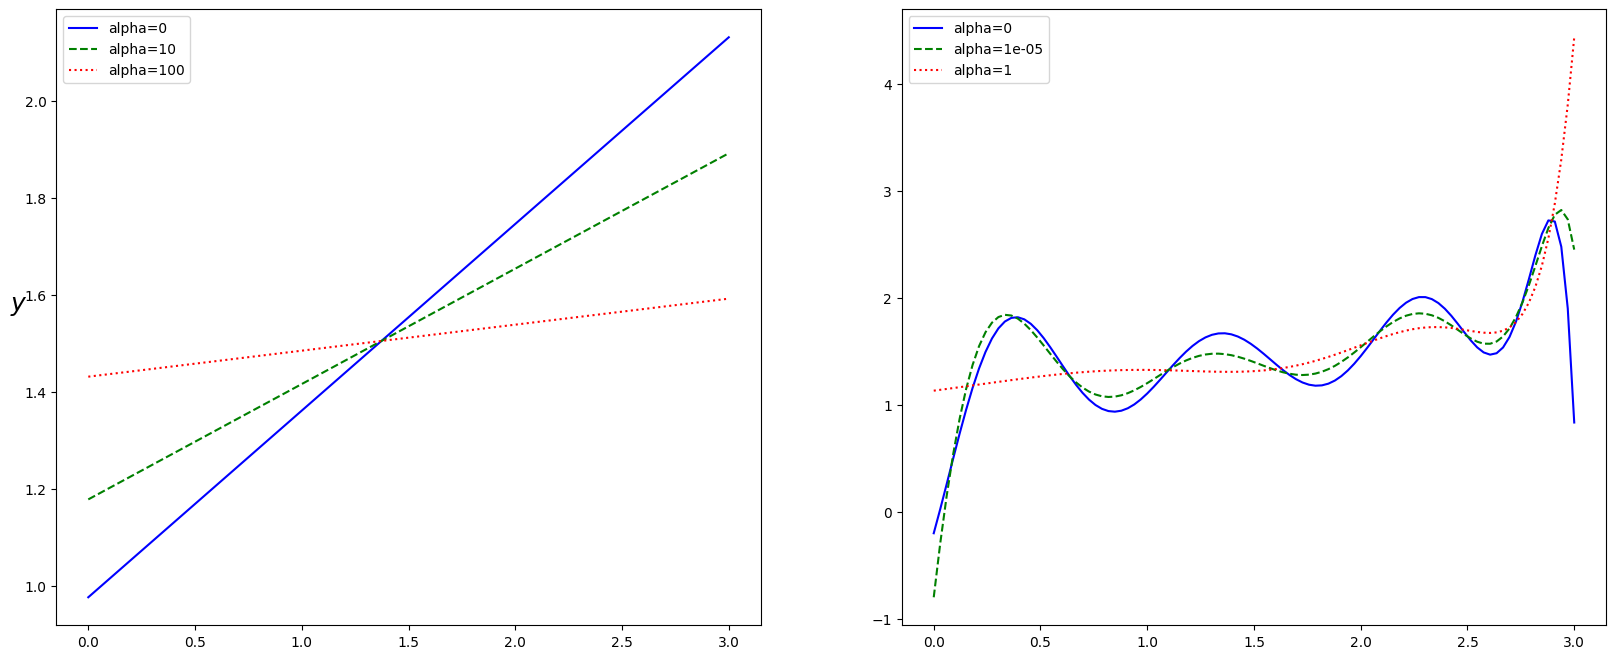

In [14]:
plt.figure(figsize=(20, 8))

# First plot without polynomial features
plt.subplot(121)
plot_model(Ridge, model_kargs={"alpha": 1.0}, polynomial=False, degrees=10, alphas=(0, 10, 100))
plt.ylabel("$y$", rotation=0, fontsize=18)

# Second plot with polynomial features
plt.subplot(122)
plot_model(Ridge, model_kargs={"alpha": 1.0}, polynomial=True, degrees=10, alphas=(0, 10**-5, 1))

plt.show()

The image on the left shows simple Ridge models taking linear predictions into account, that is, without introducing interaction features with `PolynomialFeatures`. On the right using `PolynomialFeatures(degree=10)`, this way the data is expanded to degree 10 and then scaled with `StandardScaler` and finally the Ridge models are applied to the resulting features with different values ​​of $\ alpha$.

In [ ]:
#